# WE RATE DOG DATA WRAGLING

## Gather

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

if False:
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    tweet_ids = df_1.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [3]:
import os
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open("image-predictions.tsv", mode = 'wb') as file:
  file.write(response.content)
df_image= pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
with open('tweet_json.txt', 'r') as file:
    tweet_json = pd.read_json('tweet_json.txt', lines=True)

In [5]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# Assess

#### Twitter archive table

In [6]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_1.info()
# tweet id should be object
# retweeted_status_id  should be object
# retweeted_status_user_id should be object
# timestamp should be date time
# retweeted_status_timestamp should be date time
# expanded_urls should contain only the link not html command

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
list(df_1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [9]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# Check quality issue on the name column
df_1['name'].value_counts()
# Remove "a", "an", "the" in df_1['name'] 
# Quality issue

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Daisy           7
Buddy           7
an              7
Toby            7
Bailey          7
Jax             6
Koda            6
Bella           6
Stanley         6
Leo             6
Milo            6
Jack            6
Scout           6
Oscar           6
Dave            6
Rusty           6
very            5
             ... 
Tove            1
Nico            1
Emanuel         1
Jim             1
Skittles        1
Christoper      1
Cilantro        1
Jeffri          1
Peanut          1
Margo           1
Marlee          1
Huxley          1
Howie           1
Hamrick         1
Mike            1
Blue            1
Sailer          1
Lilli           1
Iggy            1
Terrenth        1
Theo            1
Rilo            1
Lolo            1
Kayla           1
Nugget    

In [11]:
list(df_1['name'])
# "his", "one" are not names
# Quality issue

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

In [12]:
# Check to see if there is any quality issue in the doggo column
# doggo == "None" or "doggo"
df_1['doggo'].value_counts()
# No quality issue here

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
# Check to see if there is any quality issue in the floofer column
# floofer == "None" or "floofer"
df_1['floofer'].value_counts()
# No quality issue here

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
# Check to see if there is any quality issue in the pupper column
# pupper == "None" or "pupper"
df_1['pupper'].value_counts()
# No quality issue here

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
# Check to see if there is any quality issue in the puppo column
# puppo == "None" or "puppo"
df_1['puppo'].value_counts()
# No quality issue here

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
# Check to see if there is any quality issue in the rating_denominator column
# Rating_denominator == 10
df_1['rating_denominator'].value_counts()
# There are other values in this column rather than 10
# Quality issue

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# Check if there is any duplicate tweet
sum(df_1['tweet_id'].duplicated())
# All clear

0

#### Image table

In [18]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
# Check if there is any duplicate tweet
sum(df_image['tweet_id'].duplicated())
# All clear

0

In [22]:
# p1_conf <= 1
df_image['p1_conf'].max()
# No quality issue here

1.0

In [23]:
# p2_conf <= 1
df_image['p2_conf'].max()
# No quality issue here

0.48801400000000011

In [24]:
# p3_conf <= 1
df_image['p3_conf'].max()
# No quality issue here

0.27341900000000002

In [25]:
# p1_dog == "True" or "False"
df_image['p1_dog'].value_counts()
# No quality issue here

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
# p2_dog == "True" or "False"
df_image['p2_dog'].value_counts()
# No quality issue here

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
# p3_dog == "True" or "False"
df_image['p3_dog'].value_counts()
# No quality issue here

True     1499
False     576
Name: p3_dog, dtype: int64

#### Tweet_json table

In [28]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [29]:
tweet_json.info()
# contributors does not have any data
# coordinates does not have any data
# geo does not have any data
# place has only one row
# favorite_count should be int
# id should be object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [30]:
tweet_json['quoted_status_id_str']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
2324   NaN
2325   NaN
2326   NaN
2327   NaN
2328   NaN
2329   NaN
2330   NaN
2331   NaN
2332   NaN
2333   NaN
2334   NaN
2335   NaN
2336   NaN
2337   NaN
2338   NaN
2339   NaN
2340   NaN
2341   NaN
2342   NaN
2343   NaN
2344   NaN
2345   NaN
2346   NaN
2347   NaN
2348   NaN
2349   NaN
2350   NaN
2351   NaN
2352   NaN
2353   NaN
Name: quoted_status_id_str, Length: 2354, dtype: float64

In [31]:
tweet_json['extended_entities'].sample(10)
# tidiness issue
# seperate tweet_json['extended_entities'] into columns by comma

607     {'media': [{'id': 797971806841802752, 'id_str'...
352     {'media': [{'id': 831309408604868609, 'id_str'...
1473    {'media': [{'id': 693642227030085632, 'id_str'...
1460    {'media': [{'id': 694905854068285440, 'id_str'...
473     {'media': [{'id': 816091903011725312, 'id_str'...
176     {'media': [{'id': 857393395161067520, 'id_str'...
1481    {'media': [{'id': 693262842930159616, 'id_str'...
615     {'media': [{'id': 796484810906615808, 'id_str'...
1012    {'media': [{'id': 747204153907253248, 'id_str'...
1986    {'media': [{'id': 672834296361582592, 'id_str'...
Name: extended_entities, dtype: object

In [32]:
tweet_json['user'].sample(10)
# tidiness issue
# seperate tweet_json['user'] into columns by comma

265     {'id': 4196983835, 'id_str': '4196983835', 'na...
199     {'id': 4196983835, 'id_str': '4196983835', 'na...
181     {'id': 4196983835, 'id_str': '4196983835', 'na...
11      {'id': 4196983835, 'id_str': '4196983835', 'na...
1826    {'id': 4196983835, 'id_str': '4196983835', 'na...
1500    {'id': 4196983835, 'id_str': '4196983835', 'na...
2212    {'id': 4196983835, 'id_str': '4196983835', 'na...
2265    {'id': 4196983835, 'id_str': '4196983835', 'na...
543     {'id': 4196983835, 'id_str': '4196983835', 'na...
1900    {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, dtype: object

In [33]:
tweet_json['quoted_status'].sample(10)
# tidiness issue
# value should not be a dictionary
# seperate values that contain a dictionary in tweet_json['quoted_status']

2089    NaN
2004    NaN
945     NaN
2098    NaN
1455    NaN
275     NaN
1988    NaN
1793    NaN
1147    NaN
1355    NaN
Name: quoted_status, dtype: object

In [34]:
tweet_json['retweeted_status'].sample(10)
# tidiness issue
# value should not be a dictionary
# seperate values that contain a dictionary in tweet_json['retweeted_status']

227                                                   NaN
1536                                                  NaN
872                                                   NaN
90      {'created_at': 'Sun May 21 16:48:45 +0000 2017...
1770                                                  NaN
256                                                   NaN
1375                                                  NaN
1260                                                  NaN
2047                                                  NaN
1696                                                  NaN
Name: retweeted_status, dtype: object

In [35]:
tweet_json['source'].sample(10)
# quality issue
# Remove html tags in tweet_json['source']

1032    <a href="http://twitter.com/download/iphone" r...
337     <a href="http://twitter.com/download/iphone" r...
284     <a href="http://twitter.com/download/iphone" r...
310     <a href="http://twitter.com/download/iphone" r...
2114    <a href="http://twitter.com/download/iphone" r...
1985    <a href="http://twitter.com/download/iphone" r...
1166    <a href="http://twitter.com/download/iphone" r...
996     <a href="http://twitter.com/download/iphone" r...
1608    <a href="http://twitter.com/download/iphone" r...
1210    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [36]:
tweet_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


#### Quality issues

1) Change datatype of tweet id, retweeted_status_id, tweet_id to object

2) Change datatype of timestamp, and retweet_status_timstamp to date time

3) Remove "a", "an", "the", "his", "her", "one" in df_1['name'] 

4) Change all rows whose values != 10 in df_1['rating_denominator'] to 10

5) Drop columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'contributors','coordinates','geo','place','possibly_sensitive','lang','possibly_sensitive_appealable', 'id_str','retweeted_status','in_reply_to_user_id_str','quoted_status_id_str','entities','extended_entities', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id','quoted_status','quoted_status_id','user'

6) Remove html command <href> in the expanded_urls

7) Remove html tags in tweet_json['source']

8) Reformat ratings with decimal values in rating_numerator

#### Tidiness issues

9) Combine columns ['doggo', 'floofer', 'pupper', 'puppo'] to one column ['stage']

10) Merge datasets

# Clean

Make a copy of each original data set

In [37]:
df_tweeter = df_1.copy()
df_tweet = tweet_json.copy()
df_image_predict = df_image.copy()

##### Change tweet id to object

Code

In [38]:
df_tweeter['tweet_id'] = df_tweeter['tweet_id'].astype(object)

Test

In [39]:
df_tweeter['tweet_id'].describe()

count                   2356
unique                  2356
top       667495797102141441
freq                       1
Name: tweet_id, dtype: int64

##### Change retweeted_status_id to object

Code

In [40]:
df_tweeter['retweeted_status_id'] = df_tweeter['retweeted_status_id'].astype(object)

Test

In [41]:
df_tweeter['retweeted_status_id'].describe()

count     1.810000e+02
unique    1.810000e+02
top       6.675484e+17
freq      1.000000e+00
Name: retweeted_status_id, dtype: float64

##### Change the tweet_id data type from int64 to object

Code

In [42]:
#Rename columns
df_tweet = df_tweet.rename(columns={'id': 'tweet_id', 'full_text': 'text', 'created_at': 'timestamp'})

In [43]:
df_tweet['tweet_id'] = df_tweet['tweet_id'].astype(object)

Test

In [44]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
timestamp                        2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
text                             2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

##### Change the tweet_id data type from int64 to object

Code

In [45]:
df_image_predict['tweet_id'] = df_image_predict['tweet_id'].astype(object)

Test

In [46]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Change timestamp to date time

Code

In [47]:
df_tweeter['timestamp'] = df_tweeter['timestamp'].astype('datetime64[ns]')

Test

In [48]:
df_tweeter['timestamp'].describe()

count                    2356
unique                   2356
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

##### Change retweeted_status_timestamp to date time

Code

In [49]:
df_tweeter['retweeted_status_timestamp'] = df_tweeter['retweeted_status_timestamp'].astype('datetime64[ns]')

Test

In [50]:
df_tweeter['retweeted_status_timestamp'].describe()

count                     181
unique                    181
top       2016-10-03 15:42:44
freq                        1
first     2015-11-16 04:02:55
last      2017-07-19 00:47:34
Name: retweeted_status_timestamp, dtype: object

##### Remove "a", "an", "the", "his", "her", "one" in df_1['name']

Code

In [51]:
df_tweeter[df_tweeter.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
mad              2
getting          2
not              2
such             1
light            1
life             1
incredibly       1
infuriating      1
unacceptable     1
my               1
all              1
old              1
officially       1
space            1
by               1
this             1
his              1
Name: name, dtype: int64

In [52]:
df_tweeter['name'] = df_tweeter['name'].replace(['a','an','the','his','her','one','not','very','just','quite','actually','mad','getting','by','space','old','officially','unacceptable','light','infuriating','such','this','life','all','my','incredibly'], 'Null')

Test

In [53]:
list(df_tweeter['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'Null',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'Null',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None'

 ##### Change all rows whose values != 10 in df_1['rating_denominator'] to 10

Code

In [54]:
df_tweeter['rating_denominator'] = df_tweeter['rating_denominator'].replace([11,50,80,20,2,16,40,70,15,90,110,120,130,150,170,7,0],10)

Test

In [55]:
df_tweeter['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

##### Drop columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',

Code

In [56]:
df_tweeter = df_tweeter.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

Test

In [57]:
df_tweeter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Drop columns that do not contain values: contributors, coordinates, geo, place, possibly_sensitive, possibly_sensitive_appealable,lang, entities, extend_entities

Code

In [58]:
df_tweet = df_tweet.drop(columns=['contributors','coordinates','geo','place','possibly_sensitive','lang','possibly_sensitive_appealable', 'id_str','retweeted_status','in_reply_to_user_id_str','quoted_status_id_str','entities','extended_entities', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id','quoted_status','quoted_status_id','user'])

Test

In [59]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 11 columns):
timestamp             2354 non-null datetime64[ns]
display_text_range    2354 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
text                  2354 non-null object
tweet_id              2354 non-null object
is_quote_status       2354 non-null bool
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(2), object(4)
memory usage: 138.0+ KB


##### Remove html command in the expanded_urls

Code

In [60]:
df_tweeter['source'] = df_tweeter['source'].str.strip("<a href=")
df_tweeter['source'] = df_tweeter['source'].str.strip("</a>")
df_tweeter['source'] = df_tweeter['source'].str.split(pat="rel=", expand=True)

Test

In [61]:
df_tweeter['source'].sample(5)

1220    "http://twitter.com/download/iphone" 
1849    "http://twitter.com/download/iphone" 
216     "http://twitter.com/download/iphone" 
812     "http://twitter.com/download/iphone" 
169     "http://twitter.com/download/iphone" 
Name: source, dtype: object

##### Remove html tags in tweet_json['source']

Code

In [62]:
df_tweet['source'] = df_tweet['source'].str.strip("<a href=")
df_tweet['source'] = df_tweet['source'].str.strip("</a>")
df_tweet['source'] = df_tweet['source'].str.split(pat="rel=", expand=True)

Test

In [63]:
df_tweet['source'].sample(5)

1824    "http://twitter.com/download/iphone" 
886     "http://twitter.com/download/iphone" 
2120    "http://twitter.com/download/iphone" 
1622    "http://twitter.com/download/iphone" 
1505    "http://twitter.com/download/iphone" 
Name: source, dtype: object

##### Combine columns ['doggo', 'floofer', 'pupper', 'puppo'] to one column ['stage']

Code

In [64]:
df_tweeter = pd.DataFrame(df_tweeter, columns = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'stage'])

In [65]:
df_tweeter.loc[(df_tweeter['doggo'] == 'doggo') & (df_tweeter['floofer'] == 'None') & (df_tweeter['pupper'] == 'None') & (df_tweeter['puppo'] == 'None'), 'stage'] = 'doggo'
df_tweeter.loc[(df_tweeter['doggo'] == 'None') & (df_tweeter['floofer'] == 'floofer') & (df_tweeter['pupper'] == 'None') & (df_tweeter['puppo'] == 'None'), 'stage'] = 'floofer'
df_tweeter.loc[(df_tweeter['doggo'] == 'None') & (df_tweeter['floofer'] == 'None') & (df_tweeter['pupper'] == 'pupper') & (df_tweeter['puppo'] == 'None'), 'stage'] = 'pupper'
df_tweeter.loc[(df_tweeter['doggo'] == 'None') & (df_tweeter['floofer'] == 'None') & (df_tweeter['pupper'] == 'None') & (df_tweeter['puppo'] == 'puppo'), 'stage'] = 'puppo'
df_tweeter.loc[(df_tweeter['doggo'] == 'None') & (df_tweeter['floofer'] == 'None') & (df_tweeter['pupper'] == 'None') & (df_tweeter['puppo'] == 'None'), 'stage'] = 'None'

In [66]:
df_tweeter = df_tweeter.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

Test

In [67]:
df_tweeter.stage.value_counts()

None       1976
pupper      245
doggo        83
puppo        29
floofer       9
Name: stage, dtype: int64

In [68]:
df_tweeter['stage'].fillna('None')

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9        doggo
10        None
11        None
12       puppo
13        None
14       puppo
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29      pupper
         ...  
2326      None
2327      None
2328      None
2329      None
2330      None
2331      None
2332      None
2333      None
2334      None
2335      None
2336      None
2337      None
2338      None
2339      None
2340      None
2341      None
2342      None
2343      None
2344      None
2345      None
2346      None
2347      None
2348      None
2349      None
2350      None
2351      None
2352      None
2353      None
2354      None
2355      None
Name: stage, Length: 2356, dtype: object

##### Reformat ratings with decimal values in rating_numerator

Code

In [69]:
ratings = df_tweeter.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [70]:
df_tweeter.rating_numerator = ratings

Test

In [71]:
df_tweeter['rating_numerator'].value_counts()

12       558
11       464
10       461
13       351
9        158
8        102
14        54
7         54
5         35
6         32
3         19
4         17
1          9
2          9
0          2
420        2
9.75       2
15         2
20         1
44         1
144        1
143        1
1776       1
165        1
84         1
60         1
9.5        1
88         1
121        1
80         1
17         1
666        1
24         1
50         1
182        1
11.26      1
45         1
11.27      1
13.5       1
99         1
960        1
007        1
204        1
Name: rating_numerator, dtype: int64

#### Merge datasets

In [72]:
df_tweeter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 2342 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 184.1+ KB


In [73]:
df_tweeter['tweet_id'] = df_tweeter['tweet_id'].astype(object)

In [74]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 11 columns):
timestamp             2354 non-null datetime64[ns]
display_text_range    2354 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
text                  2354 non-null object
tweet_id              2354 non-null object
is_quote_status       2354 non-null bool
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(2), object(4)
memory usage: 138.0+ KB


In [75]:
# create a new clean dataframe called df_clean
# merge df_1 and tweet_json
df_clean = df_tweeter.merge(df_tweet, how='outer', on=['tweet_id','text', 'timestamp', 'source'])

In [76]:
# merge df_clean and df_image
df_clean = df_clean.merge(df_image_predict, how='outer', on=['tweet_id'])

In [77]:
df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,expanded_urls,rating_numerator,rating_denominator,name,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
90,874680097055178752,2017-06-13 17:29:20,"""http://twitter.com/download/iphone""",Meet Cash. He hath acquired a stick. A very go...,https://twitter.com/dog_rates/status/874680097...,https://twitter.com/dog_rates/status/874680097...,12,10,Cash,None,...,1.0,Labrador_retriever,0.836052,True,Staffordshire_bullterrier,0.047069,True,beagle,0.036007,True
538,806620845233815552,2016-12-07 22:06:10,"""http://twitter.com/download/iphone""",RT @dog_rates: Idk why this keeps happening. W...,https://twitter.com/dog_rates/status/781524693...,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,707776935007539200,2016-03-10 03:55:45,"""http://twitter.com/download/iphone""",This is Sadie. She's a Bohemian Rhapsody. Rema...,https://twitter.com/dog_rates/status/707776935...,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,...,1.0,miniature_pinscher,0.890426,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True
1567,687826841265172480,2016-01-15 02:41:12,"""http://twitter.com/download/iphone""",This is Louis. He's a rollercoaster of emotion...,https://twitter.com/dog_rates/status/687826841...,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,None,...,1.0,Pomeranian,0.997210,True,Pekinese,0.000803,True,keeshond,0.000373,True
308,835574547218894849,2017-02-25 19:37:50,"""http://twitter.com/download/iphone""",This is Eli. He works backstage at Bone Jovi c...,https://twitter.com/dog_rates/status/835574547...,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,...,1.0,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
1005,747651430853525504,2016-06-28 04:42:46,"""http://twitter.com/download/iphone""",Other pupper asked not to have his identity sh...,NaN,NaN,12,10,None,pupper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1600,686007916130873345,2016-01-10 02:13:27,"""http://twitter.com/download/iphone""",This pupper has a magical eye. 11/10 I can't s...,https://twitter.com/dog_rates/status/686007916...,https://twitter.com/dog_rates/status/686007916...,11,10,None,pupper,...,1.0,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False
1828,676263575653122048,2015-12-14 04:52:55,"""http://twitter.com/download/iphone""",All this pupper wanted to do was go skiing. No...,https://twitter.com/dog_rates/status/676263575...,https://twitter.com/dog_rates/status/676263575...,10,10,None,pupper,...,1.0,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
230,847978865427394560,2017-04-01 01:08:10,"""http://twitter.com/download/iphone""",RT @dog_rates: This is Charlie. He fell asleep...,https://twitter.com/dog_rates/status/832369877...,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1365,702684942141153280,2016-02-25 02:42:00,"""http://twitter.com/download/iphone""",This is Lucy. She's sick of these bullshit gen...,https://twitter.com/dog_rates/status/702684942...,https://twitter.com/dog_rates/status/702684942...,11,10,Lucy,None,...,1.0,golden_retriever,0.514085,True,Chesapeake_Bay_retriever,0.173224,True,Brittany_spaniel,0.118384,True


In [78]:
# p1_dog', 'p2_dog' & 'p3_dog' have the wrong data type
#Change 'p1_dog', 'p2_dog' & 'p3_dog' to boolean type
df_clean['p1_dog'] = df_clean['p1_dog'].astype(bool)
df_clean['p2_dog'] = df_clean['p2_dog'].astype(bool)
df_clean['p3_dog'] = df_clean['p3_dog'].astype(bool)

Test

In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 2342 non-null object
display_text_range    2354 non-null object
favorite_count        2354 non-null float64
favorited             2354 non-null object
is_quote_status       2354 non-null object
retweet_count         2354 non-null float64
retweeted             2354 non-null object
truncated             2354 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2

In [80]:
sum(df_clean['tweet_id'].duplicated())

0

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 2342 non-null object
display_text_range    2354 non-null object
favorite_count        2354 non-null float64
favorited             2354 non-null object
is_quote_status       2354 non-null object
retweet_count         2354 non-null float64
retweeted             2354 non-null object
truncated             2354 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2

In [82]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)

In [83]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,expanded_urls,rating_numerator,rating_denominator,name,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Save df_clean to csv file

In [84]:
df_clean.to_csv(r'twitter_archive_master.csv', index = False)

# Visualization

#### Question 1: Which dog stage "Doggo", "Pupper", "Puppo" and "Fluffer have the highest favorites and retweets on average?

In [85]:
fav_retweet = df_clean.groupby(['stage']).mean()[['favorite_count', 'retweet_count']]

In [86]:
fav_retweet

,favorite_count,retweet_count
stage,,
None,7761.082025,2948.880506
doggo,15694.963855,7520.253012
floofer,11064.444444,4155.888889
pupper,6588.049180,2879.467213
puppo,17204.586207,6146.137931


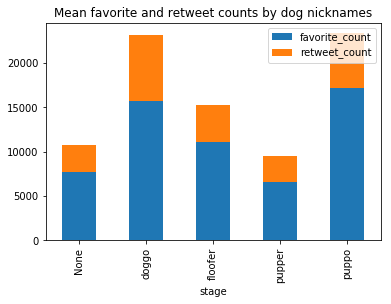

In [87]:
fav_retweet.plot.bar(title='Mean favorite and retweet counts by dog nicknames', stacked=True)

The stage "puppo" ranks the highest average favorite count with 18225.
In contrast, "pupper" receives the lowest favorite count with only 6750 on average.

Tweets contain dog stage "doggo" that has the highest average retweet count with 7295.
On contrary, tweets with no dog stage at all ranked lowest retweet count at 2948.

#### Question 2: What are the top 10 most popular dog breed make appearance on WeRateDog's Twitter Account?

In [88]:
#Create a new dataframe from df_clean only contains tweet_id, p1, p1_dog, p2, p2_dog, p3, p3_dog and the dog_breed column
df_breed = df_clean.drop(columns = ['timestamp', 'source','text','expanded_urls','rating_numerator', 'rating_denominator', 'display_text_range', 'is_quote_status', 'name', 'favorited', 'retweeted', 'truncated', 'jpg_url', 'img_num', 'favorite_count', 'retweet_count', 'stage', 'p1_conf', 'p2_conf', 'p3_conf'])

In [89]:
df_breed.head()

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,892420643555336193,orange,False,bagel,False,banana,False
1,892177421306343426,Chihuahua,True,Pekinese,True,papillon,True
2,891815181378084864,Chihuahua,True,malamute,True,kelpie,True
3,891689557279858688,paper_towel,False,Labrador_retriever,True,spatula,False
4,891327558926688256,basset,True,English_springer,True,German_short-haired_pointer,True


In [90]:
# Add values to column 'dog_breed'
# If p1 == True -> p1 == dog_breed
# elif p2 == True -> p2 == dog_breed
# elif p3 == True -> p3 == dog_breed
# else Null == dog_breed

df_breed['dog_breed'] = 'Null'
df_breed.loc[df_breed.p1_dog , 'dog_breed'] = df_breed.loc[df_breed.p1_dog , 'p1']
df_breed.loc[df_breed.p2_dog & ~df_breed.p1_dog, 'dog_breed'] = df_breed.loc[df_breed.p2_dog & ~df_breed.p1_dog, 'p2']
df_breed.loc[df_breed.p3_dog & ~df_breed.p1_dog &~df_breed.p2_dog, 'dog_breed'] = df_breed.loc[df_breed.p3_dog & ~df_breed.p1_dog &~df_breed.p2_dog, 'p3']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [91]:
df_breed[['p1_dog','p1','p2_dog','p2','p3_dog','p3','dog_breed']]

,p1_dog,p1,p2_dog,p2,p3_dog,p3,dog_breed
0,False,orange,False,bagel,False,banana,Null
1,True,Chihuahua,True,Pekinese,True,papillon,Chihuahua
2,True,Chihuahua,True,malamute,True,kelpie,Chihuahua
3,False,paper_towel,True,Labrador_retriever,False,spatula,Labrador_retriever
4,True,basset,True,English_springer,True,German_short-haired_pointer,basset
5,True,Chesapeake_Bay_retriever,True,Irish_terrier,False,Indian_elephant,Chesapeake_Bay_retriever
6,True,Appenzeller,True,Border_collie,False,ice_lolly,Appenzeller
7,True,Pomeranian,True,Eskimo_dog,True,Pembroke,Pomeranian
8,True,Irish_terrier,True,Irish_setter,True,Chesapeake_Bay_retriever,Irish_terrier
9,True,Pembroke,True,Cardigan,True,Chihuahua,Pembroke


In [92]:
# drop rows that do not have a dog breed
df_breed = (df_breed[df_breed['dog_breed'] != 'Null']).dropna()

In [93]:
# create a new dataframe breed for visualization
# breed dataframe contains name of the breed and no. that breed occurs on WeRateDog's Twitter account
# Select top 10 most popular breeds
breed = df_breed['dog_breed'].value_counts().reset_index()
breed.columns = ['Breed', 'Counts']
breed = breed.head(11)
breed['Breed'] = breed['Breed'].replace(['golden_retriever','Labrador_retriever','pug','toy_poodle','chow','malamute','cocker_spaniel'],['Golden Retriever','Labrador Retriever','Pug','Toy Poodle','Chow','Malamute','Cocker Spaniel'])

In [94]:
breed

,Breed,Counts
0,Golden Retriever,173
1,Labrador Retriever,113
2,Pembroke,96
3,Chihuahua,95
4,Pug,65
5,Toy Poodle,52
6,Chow,51
7,Samoyed,46
8,Pomeranian,42
9,Cocker Spaniel,34


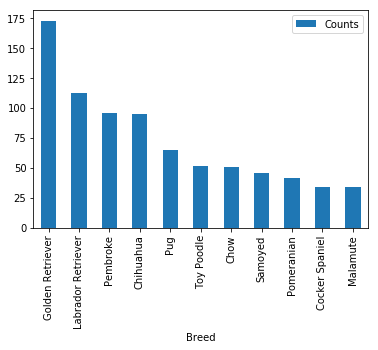

In [95]:
base_color = sb.color_palette()[0]
breed.plot.bar(x='Breed', y='Counts', color=base_color)

The top ten most popular dog breeds that make appearance on the WeRateDog Twitter account are: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Toy Poodle, Chow, Samoyed, Pomeranian, Malamute and Cocker Spaniel respectively.